##  Survey


In [45]:
# Try to use Seaborn/Matplotlib to replicate another cool viz from Cole Nusaumbber Knaflic's book Storytelling with Data.
# Inspiration from :
# https://github.com/adamribaudo/storytelling-with-data-ggplot
# Using code from the excellent:
# https://github.com/empathy87/storytelling-with-data

## Import libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib import transforms
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FixedLocator, FixedFormatter
%matplotlib inline

In [17]:
# define colors
GRAY1, GRAY2, GRAY3 = '#231F20', '#414040', '#555655'
GRAY4, GRAY5, GRAY6 = '#646369', '#76787B', '#828282'
GRAY7, GRAY8, GRAY9 = '#929497', '#A6A6A5', '#BFBEBE'
BLUE1, BLUE2, BLUE3, BLUE4 = '#174A7E', '#4A81BF', '#94B2D7', '#94AFC5'
BLUE5, BLUE6 = '#92CDDD', '#2E869D'
RED1, RED2 = '#C3514E', '#E6BAB7'
GREEN1, GREEN2 = '#0C8040', '#9ABB59'
ORANGE1, ORANGE2, ORANGE3 = '#F79747', '#FAC090', '#F36721'

In [18]:
# configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'
# configure mathtext bold and italic font family to Arial
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'

#### Dummy Data

In [19]:

c1 = ['Proposal A', 'Proposal B' ,'Proposal C', 'Proposal D']
c2 = [1,  5,   8,  11]
c3 = [66, 83,  83, 80]
c4 = [33, 12,  9,  9]

df = pd.DataFrame ({'Item': c1, 
                   'Data_Bottom': c2,
                   'Data_Middle': c3,
                   'Data_Top'   : c4 
                   })

df  = df.sort_index(ascending=False)

df.head()

,Item,Data_Bottom,Data_Middle,Data_Top
3,Proposal D,11,80,9
2,Proposal C,8,83,9
1,Proposal B,5,83,12
0,Proposal A,1,66,33


In [20]:
for i,name in enumerate(df.Item):
    print (df.Data_Bottom[i] )

1
5
8
11


In [21]:
# Thank you to Andrey / empathy87 on github

def rainbow_text(x, y, text, colors, spacing=20, ax=None, **kw):
    colors = list(reversed(colors))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, line in enumerate(reversed(text.split('\n'))):
        strings = line.split('||')
        for s, c in zip(strings, colors[i]):
            text = ax.text(x, y, s, color=c, transform=t, **kw)
            text.draw(canvas.get_renderer())
            ex = text.get_window_extent()
            t = transforms.offset_copy(text._transform, x=ex.width, 
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * spacing, 
                                   units='dots')
        

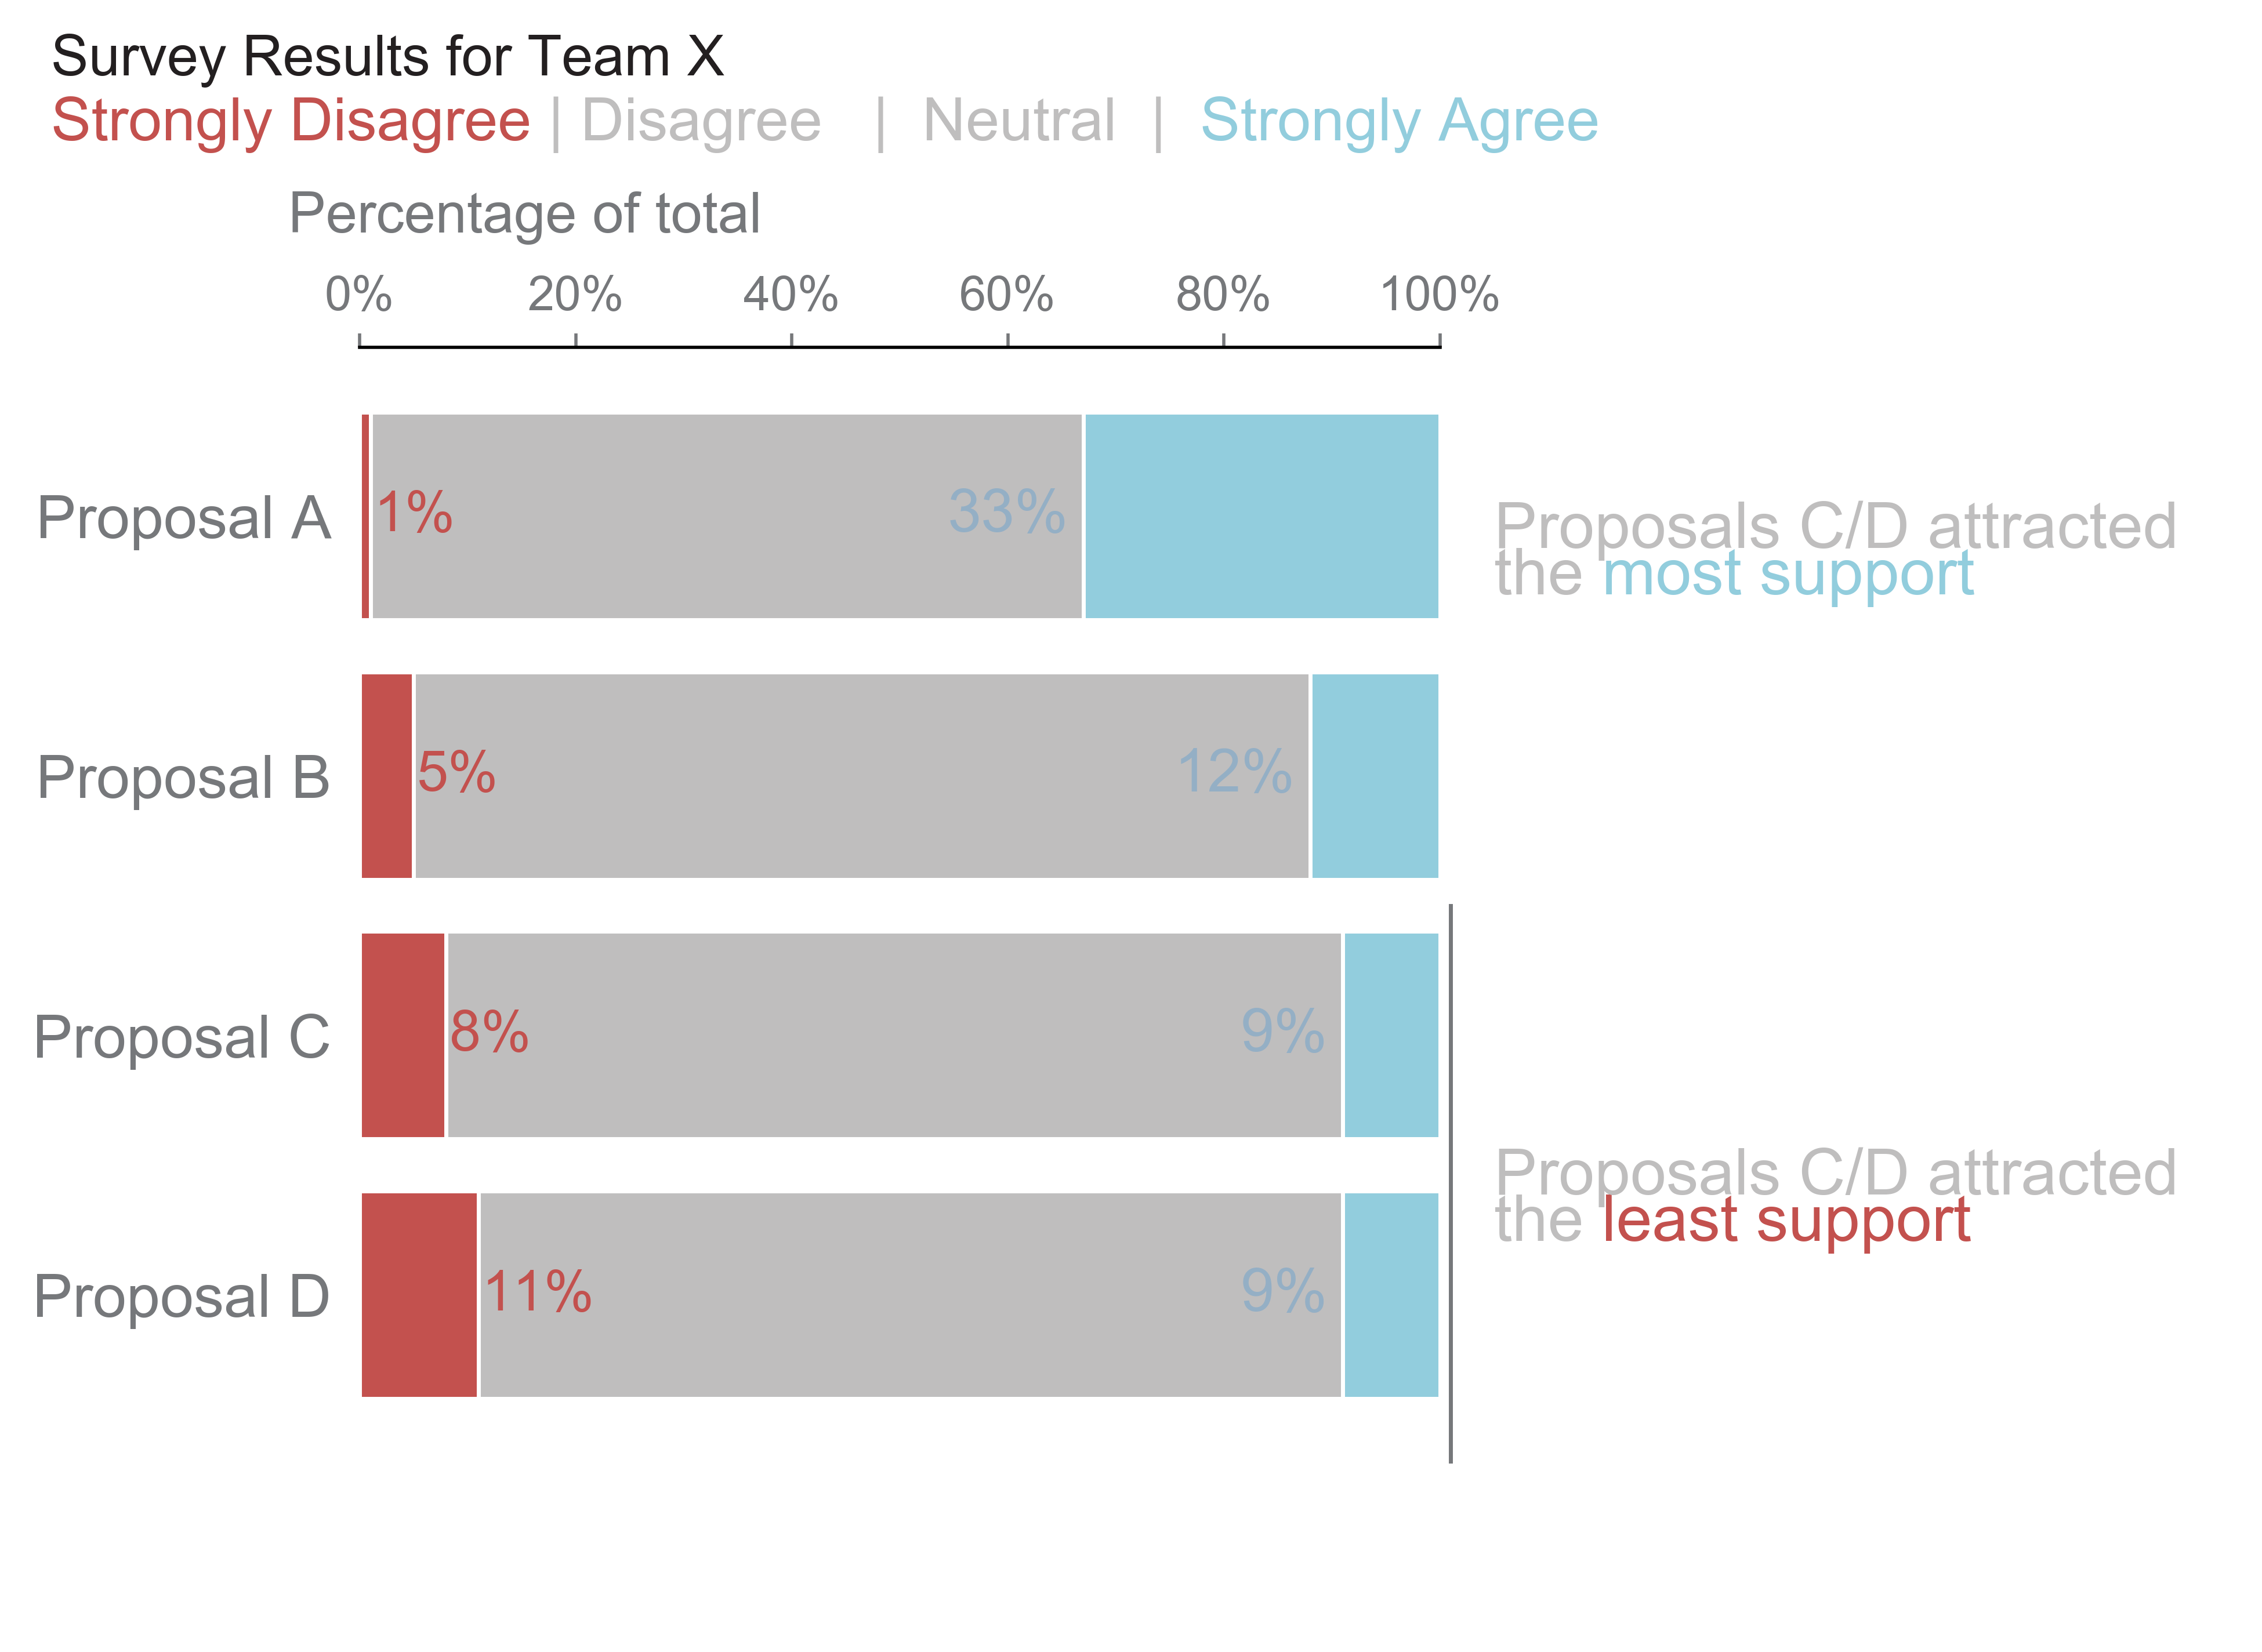

In [48]:
fig = plt.figure(figsize=(7.6, 5.5), dpi=500)


# Force figure to be size as above
ax0 = fig.add_axes( (0,0,1,1))
ax0.axis('Off') # don't draw anything.

# Now position the real subplot so that it has a bigger border
ax = fig.add_axes((0.15, 0.1, 0.50, 0.7))

ax0.text( 0.01, 0.98 , 'Survey Results for Team X', ha='left',  va='center', fontsize=14,color= GRAY1)

# Add the legend
rainbow_text(
    0.01, 0.93,
    'Strongly Disagree|| | Disagree   |  Neutral  | || Strongly Agree ', 
    colors=[[RED1,GRAY9,BLUE5]]
    ,ax=ax0,
    fontsize=15, spacing=15)

rainbow_text(
    105, 2.7,
    'Proposals C/D attracted\nthe|| most support', 
    colors=[[GRAY9], 
           [GRAY9,BLUE5]]
    ,ax=ax,
    fontsize=16, spacing=80)

rainbow_text(
    105, 0.21,
    'Proposals C/D attracted\nthe|| least support', 
    colors=[[GRAY9], 
           [GRAY9,RED1]]
    ,ax=ax,
    fontsize=16, spacing=80)

df.plot (kind="barh", alpha=1.0, stacked=True , 
             color =[RED1, GRAY9, BLUE5], 
             ax=ax,  edgecolor = "white", width=0.8) 

# Add annotation line
plt.axvline(x=105, ymin=-3, ymax=3, color=GRAY1, alpha=0.4, linewidth=1.0)
plt.axhline(xmin=0, xmax=5, y=50, color=GRAY1, alpha=0.4)

ax.axvline(x=101, ymin=-0.2, ymax=0.5,   color=GRAY5, linewidth=1.0) 

# Set and Format the y axis
ax.yaxis.set_ticklabels( df.Item )
ax.tick_params (axis='y', width=0 ,labelsize=15, colors=GRAY5)

# Set up and format x axis
ax.set_xlim (0,102)
ax.tick_params(axis="x", direction="out", colors=GRAY5)
ax.tick_params(axis="x", labelcolor=GRAY5, labelsize=12,  labeltop=True)

# Add in bottom data and top labels. Coords are x, y

for i,name in (enumerate(df.Item)) :
    
    x_val =  df.Data_Bottom[3-i] # 3- because the data frame has been sorted.  
    ax.text( x_val + 0.3 , i , str(x_val) + '%',     ha='left',  va='center', fontsize=14,color= RED1 )

    # Annotate Data Top 
    x_val =  df.Data_Top[3-i] # the data label.
    ax.text( (100- x_val)- 1.4 , i , str(x_val) + '%' ,     ha='right',  va='center', fontsize=15,color= BLUE4 )
    
# .. Axis Title
ax.xaxis.set_label_coords(0.15, 1.14)
plt.xlabel('Percentage of total',fontsize=14,color =GRAY5)
#fig.canvas.draw() # this is essential

fig.canvas.draw() # this is essential to extract the label values...
labels = [item.get_text() + '%'  for item in ax.get_xticklabels()]
ax.set_xticklabels(labels)

ax.spines['top'].set_bounds(0, 100)

ax.legend().set_visible(False)
sns.despine (left=True, top=False, bottom=True)

plt.savefig ('plots/survey_results1')

